In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np 

In [ ]:
import json
with open("tr-cities-utf8.json") as f:
    cities = json.load(f)

In [ ]:
import pandas as pd
df = pd.read_csv('data education.xlsx - Sheet4.csv')
df.set_index('id', inplace=True)
df

,province,year,prim,high,univ
id,,,,,
1,Adana,2008,469036,300221,93801
1,Adana,2020,306659,442028,273968
2,Adıyaman,2008,107482,62867,13952
2,Adıyaman,2020,72621,108775,64693
3,Afyonkarahisar,2008,228018,82334,23466
...,...,...,...,...,...
79,İzmir,2020,718534,925803,731822
80,Şanlıurfa,2008,169298,82228,19316
80,Şanlıurfa,2020,175437,222391,126361


In [ ]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [ ]:
univ_distr = df[['province', 'year', 'univ']]
univ_distr = univ_distr.sort_values('univ',ascending=False)
univ_distr

,province,year,univ
id,,,
78,İstanbul,2020,2449003
6,Ankara,2020,1081726
78,İstanbul,2008,808981
79,İzmir,2020,731822
6,Ankara,2008,442315
...,...,...,...
36,Iğdır,2008,4085
69,Tunceli,2008,3880
43,Kilis,2008,3267


In [ ]:
year_2008_univ = univ_distr[univ_distr.year==2008]
lst_08_univ = [row for row in year_2008_univ['univ']]

In [ ]:
univ_gini_2008 = gini(np.array(lst_08, dtype=np.float32))
univ_gini_2008

0.6663041584401815

In [ ]:
prim_distr = df[['province', 'year', 'prim']]
prim_distr = prim_distr.sort_values('prim',ascending=False)
prim_distr

,province,year,prim
id,,,
78,İstanbul,2008,3204062
78,İstanbul,2020,1980095
79,İzmir,2008,1077920
6,Ankara,2008,977183
21,Bursa,2008,730087
...,...,...,...
69,Tunceli,2008,16702
33,Hakkari,2020,15340
43,Kilis,2020,13328


In [ ]:
year_2008_prim = prim_distr[prim_distr.year==2008]
lst_08_prim = [row for row in year_2008_prim['prim']]

In [ ]:
prim_gini_2008 = gini(np.array(lst_08_prim, dtype=np.float32))
prim_gini_2008

0.5661993619902924

In [ ]:
high_distr = df[['province', 'year', 'high']]
high_distr = high_distr.sort_values('high',ascending=False)
high_distr

,province,year,high
id,,,
78,İstanbul,2020,3025720
78,İstanbul,2008,2044677
6,Ankara,2020,1251654
6,Ankara,2008,930776
79,İzmir,2020,925803
...,...,...,...
15,Bayburt,2020,17234
8,Ardahan,2020,16301
8,Ardahan,2008,11990


In [ ]:
year_2008_high = high_distr[high_distr.year==2008]
lst_08_high = [row for row in year_2008_high['high']]

In [ ]:
high_gini_2008 = gini(np.array(lst_08_high, dtype=np.float32))
high_gini_2008

0.5985454122149587

In [ ]:
print("Primary education level gini coefficient in year 2008 is", prim_gini_2008)
print("High school education level gini coefficient in year 2008 is", high_gini_2008)
print("University education level gini coefficient in year 2008 is", univ_gini_2008)

Primary education level gini coefficient in year 2008 is 0.5661993619902924
High school education level gini coefficient in year 2008 is 0.5985454122149587
University education level gini coefficient in year 2008 is 0.6663041584401815


In [ ]:
year_2020_high = high_distr[high_distr.year==2020]
lst_20_high = [row for row in year_2020_high['high']]
year_2020_prim = prim_distr[prim_distr.year==2020]
lst_20_prim = [row for row in year_2020_prim['prim']]
year_2020_univ = univ_distr[univ_distr.year==2020]
lst_20_univ = [row for row in year_2020_univ['univ']]
high_gini_2020 = gini(np.array(lst_20_high, dtype=np.float32))
prim_gini_2020 = gini(np.array(lst_20_prim, dtype=np.float32))
univ_gini_2020 = gini(np.array(lst_20_univ, dtype=np.float32))

print("Primary education level gini coefficient in year 2020 is", prim_gini_2020)
print("High school education level gini coefficient in year 2020 is", high_gini_2020)
print("University education level gini coefficient in year 2020 is", univ_gini_2020)

Primary education level gini coefficient in year 2020 is 0.5524662781985012
High school education level gini coefficient in year 2020 is 0.5794221276669614
University education level gini coefficient in year 2020 is 0.6237939557115728


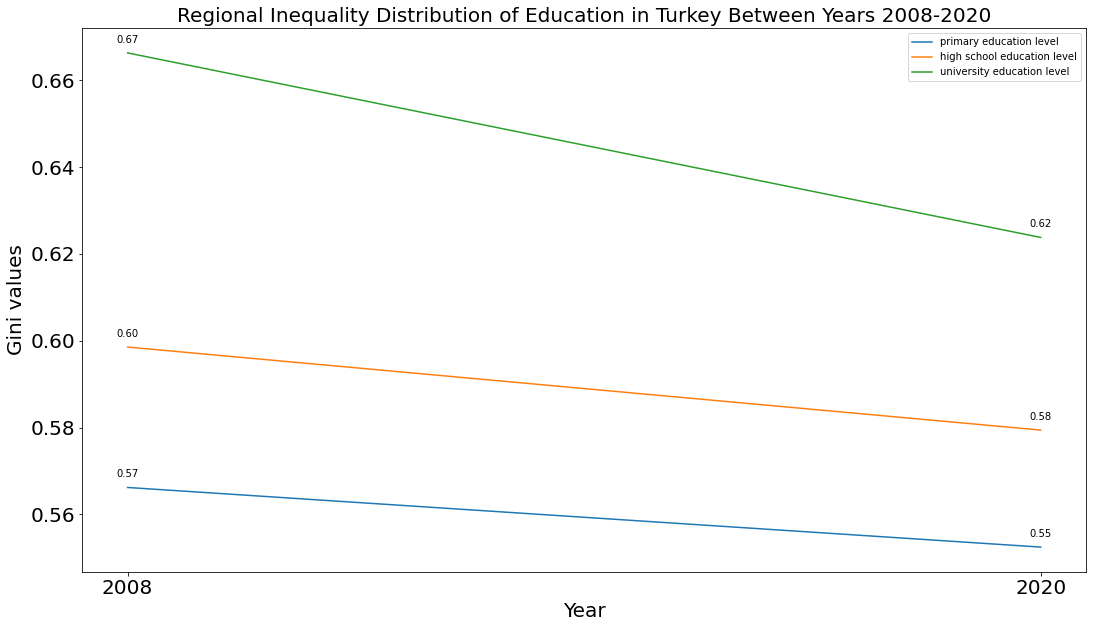

In [ ]:
import matplotlib.pyplot as plt

y1 = ['2008','2020']
gini_prim = [prim_gini_2008,prim_gini_2020]
gini_high = [high_gini_2008,high_gini_2020]
gini_univ = [univ_gini_2008,univ_gini_2020]

fig, ax = plt.subplots()
fig.set_size_inches(18,10)
ax.plot(y1,gini_prim,label='primary education level')
ax.plot(y1,gini_high,label='high school education level')
ax.plot(y1,gini_univ,label='university education level')
plt.ylabel('Gini values', size = 20)
plt.xlabel('Year', size = 20)
plt.title('Regional Inequality Distribution of Education in Turkey Between Years 2008-2020', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
ax.legend(loc = 'upper right')

for x,y in zip(y1,gini_prim):

  label = "{:.2f}".format(y)

  plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') 
    
for x,y in zip(y1,gini_high):

  label = "{:.2f}".format(y)

  plt.annotate(label, # this is the text
                (x,y), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') 
  
for x,y in zip(y1,gini_univ):

  label = "{:.2f}".format(y)

  plt.annotate(label, # this is the text
                (x,y), # this is the point to label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center') 
plt.show()

In [ ]:
fig = px.choropleth_mapbox(df, geojson=cities, locations=df.index, color=np.log10(df["prim"]),hover_name="province", animation_frame=df["year"],
                           color_continuous_scale='purples',
                           
                           mapbox_style="carto-positron",
                           zoom=4, center = {"lat": 38.963745, "lon": 35.243322},
                           opacity=0.7,
                           labels={'color':'prim','id': 'city'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = px.choropleth_mapbox(df, geojson=cities, locations=df.index, color=np.log10(df["high"]),hover_name="province", animation_frame=df["year"],
                           color_continuous_scale='purples',
                           
                           mapbox_style="carto-positron",
                           zoom=4, center = {"lat": 38.963745, "lon": 35.243322},
                           opacity=0.7,
                           labels={'color':'prim','id': 'city'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
fig = px.choropleth_mapbox(df, geojson=cities, locations=df.index, color=np.log10(df["univ"]),hover_name="province", animation_frame=df["year"],
                           color_continuous_scale='purples',
                           
                           mapbox_style="carto-positron",
                           zoom=4, center = {"lat": 38.963745, "lon": 35.243322},
                           opacity=0.7,
                           labels={'color':'prim','id': 'city'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()